https://img.pokemondb.net/artwork/squirtle.jpg


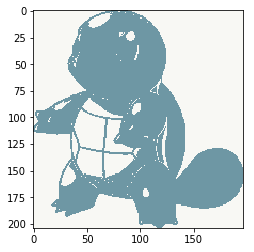

In [209]:
import requests
import PIL
import io
import numpy as np
import cv2

colors = []

page = requests.get('https://pokemondb.net/pokedex/squirtle')
soup= BeautifulSoup(page.content, 'html.parser')
img_link = soup.select('div.col.desk-span-4.lap-span-6.figure img')[0]['src']
print(img_link)


img = requests.get(img_link, stream=True)
img.raw.decode_content = True
image = PIL.Image.open(img.raw)


img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#cv2.imshow('res2',res2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

import matplotlib.pyplot as plt
b,g,r = cv2.split(res2)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)
plt.show()


In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
main_page = requests.get('https://pokemondb.net/pokedex/all')
soup = BeautifulSoup(main_page.content, 'html.parser')

In [ ]:
poke_html_list = soup.select('a.ent-name')
poke_list = []
for poke in poke_html_list:
    if poke['href'] not in poke_list: poke_list.append(poke['href'])

In [ ]:
pokemon_list = []
base_stats = []
type_ = []

for pokemon in poke_list:
    page2 = requests.get('https://pokemondb.net' + pokemon)
    soup2 = BeautifulSoup(page2.content, 'html.parser')
    
    #print(pokemon)
    pokemon_list.append(soup2.select('article h1')[0].text)
    
    stats = soup2.select('div.colset table.vitals-table tbody td.num') #selecting all the numbers
    stat_numbers = []
    for index, i in enumerate(stats):
        if (index)%3 ==0: stat_numbers.append(i.text) #every 3 is one of the main stats
    base_stats.append(stat_numbers)
    
    
    types = soup2.select('table.vitals-table tbody tr a.type-icon')
    ind_type = []
    for i in types:
        ind_type.append(i.text)
    type_.append(list(set(ind_type)))


In [242]:
hp = []
att = []
defs = []
spatt = []
spdef = []
spe = []

for i in base_stats:
    hp.append(i[0])
    att.append(i[1])
    defs.append(i[2])
    spatt.append(i[3])
    spdef.append(i[4])
    spe.append(i[5])
    
first_type = []
for i in type_:
    first_type.append(i[0])

In [243]:
import pandas as pd
dataf = pd.DataFrame({'pokemon': pokemon_list,
                      'hp': hp,
                      'att': att,
                      'defs': defs,
                      'spatt': spatt,
                      'spdef': spdef,
                      'spe': spe,
                      'type': first_type,
                      'types': type_})


# Setting up the training and testing datasets
dataf2 = dataf.copy().drop('pokemon', axis=1).as_matrix()

train = dataf2[0:721]
trainX = train[:,0:5]
trainy = train[:,6]
test = dataf2[721:len(dataf), ]
testX = test[:,0:5]
testy = test[:,6]
testy2 = test[:,7]


In [244]:
from sklearn import neighbors
knn_clf = neighbors.KNeighborsClassifier()
clf = GridSearchCV(estimator = knn_clf, param_grid=dict(n_neighbors = list(range(1,25))))
clf.fit(trainX, trainy)
print(clf.best_estimator_) # best n_neighbors = 10

knn_clf = neighbors.KNeighborsClassifier(n_neighbors = 23)
knn_clf.fit(trainX, trainy)
print('knn classification rate:', str(sum(knn_clf.predict(testX) == testy)/len(testy)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')
knn classification rate: 0.11627906976744186


In [245]:
two_colors = []

big_list = []
res3 = res2.tolist()

for i in res3:
    big_list.extend(i)
for i in big_list:
    in_list = i in two_colors
    if in_list == False: two_colors.append(i)


In [ ]:
import requests
import PIL
import io
import numpy as np
import cv2

poke_col_list = []

for pokemon in poke_list:
    page2 = requests.get('https://pokemondb.net' + pokemon)
    soup2 = BeautifulSoup(page2.content, 'html.parser')

    img_link = soup2.select('div.col.desk-span-4.lap-span-6.figure img')[0]['src']
    print(img_link)

    img = requests.get(img_link, stream=True)
    img.raw.decode_content = True
    image = PIL.Image.open(img.raw)


    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    Z = img.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)
    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 2
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    
    # extracting the two colors
    two_colors = []
    big_list = []
    res3 = res2.tolist()
    for i in res3:
        big_list.extend(i)
    for i in big_list:
        in_list = i in two_colors
        if in_list == False: two_colors.append(i)
    # the color that is farther away from 250 (white) is probably the pokemon's dominant color
    
    main_color = [sorted(two_colors)[0]] # each array is (BGR) instead of (RGB)
    poke_col_list.append(main_color)
    

In [246]:
poke_col_list_flat = []
for i in poke_col_list:
    for j in i:
        poke_col_list_flat.append(j)
b, g, r = zip(*poke_col_list_flat) # create new lists that correspond to blue, green, and red channel

In [247]:
dataf['b'] = b
dataf['g'] = g
dataf['r'] = r
color = []
for i in range(0,len(dataf)):
    index = dataf.iloc[i]
    col = 'rgb'+str(tuple([index.r, index.g, index.b]))
    color.append(col)
dataf['color'] = color
dataf.pokemon

0        Bulbasaur
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
5        Charizard
6         Squirtle
7        Wartortle
8        Blastoise
9         Caterpie
10         Metapod
11      Butterfree
12          Weedle
13          Kakuna
14        Beedrill
15          Pidgey
16       Pidgeotto
17         Pidgeot
18         Rattata
19        Raticate
20         Spearow
21          Fearow
22           Ekans
23           Arbok
24         Pikachu
25          Raichu
26       Sandshrew
27       Sandslash
28        Nidoran♀
29        Nidorina
          ...     
777        Mimikyu
778        Bruxish
779         Drampa
780       Dhelmise
781       Jangmo-o
782       Hakamo-o
783        Kommo-o
784      Tapu Koko
785      Tapu Lele
786      Tapu Bulu
787      Tapu Fini
788         Cosmog
789        Cosmoem
790       Solgaleo
791         Lunala
792       Nihilego
793       Buzzwole
794      Pheromosa
795      Xurkitree
796     Celesteela
797        Kartana
798       Gu

In [203]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

trace1 = go.Scatter3d(
    x=dataf['r'],
    y=dataf['b'],
    z=dataf['g'],
    mode='markers',
    marker=dict(
        color=dataf['color'],
        size=5,
        line=dict(
            color= dataf['color'],
            width=0.5
        ),
        opacity=0.8
    ),
    text = dataf.pokemon
)

data = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = 'Red'),
        yaxis = dict(title = 'Blue'),
        zaxis = dict(title = 'Green')
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

Interesting results... now, keeping the same axis, let's group by type to see if they're clustered.

In [197]:
import random

color_type_dict = {}

for i in np.unique(dataf.type):
    red = random.randint(0,255)
    green = random.randint(0,255)
    blue = random.randint(0,255)
    color_type_dict[i] = 'rgb'+'('+ str(red) +',' + str(green)+',' + str(blue) + ')'


In [202]:
color_type = []
for i in range(0,len(dataf)):
    p_type = dataf.iloc[i].type
    color_item = color_type_dict[p_type]
    col = color_item
    color_type.append(col)
    
dataf['color_type'] = color_type


trace2 = go.Scatter3d(
    x=dataf['r'],
    y=dataf['b'],
    z=dataf['g'],
    mode='markers',
    marker=dict(
        color=dataf['color_type'],
        size=5,
        line=dict(
            color= dataf['color_type'],
            width=0.5
        ),
        opacity=0.8
    ),
    text = dataf['type']
)

data2 = [trace2]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(title = 'Red'),
        yaxis = dict(title = 'Blue'),
        zaxis = dict(title = 'Green')
    )
)
fig2 = go.Figure(data=data2, layout=layout)
py.iplot(fig2, filename='simple-3d-scatter2')

Just looking at this scatterplot, you can't really see any clusters of pokemon types based on colors... but just out of curiousity I'll try using knn to classify by color.

In [248]:
# split up the datasets
dataf2 = dataf.copy().drop('pokemon', axis=1).as_matrix()
train = dataf2[0:721]
trainX = train[:,[8,9,10]]
trainy = train[:,6]
test = dataf2[721:len(dataf), ]
testX = test[:,[8,9,10]]
testy = test[:,6]
testy2 = test[:,7]


In [251]:
from sklearn import neighbors
knn_clf = neighbors.KNeighborsClassifier()
clf = GridSearchCV(estimator = knn_clf, param_grid=dict(n_neighbors = list(range(1,25))))
clf.fit(trainX, trainy)
print(clf.best_estimator_) # best n_neighbors = 10

knn_clf = neighbors.KNeighborsClassifier(n_neighbors = 21)
knn_clf.fit(trainX, trainy)
print('knn classification rate:', str(sum(knn_clf.predict(testX) == testy)/len(testy)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')
knn classification rate: 0.12790697674418605


In [221]:
dataf

,att,defs,hp,pokemon,spatt,spdef,spe,type,types,b,g,r,color,color_type
0,49,49,45,Bulbasaur,65,65,45,Poison,"[Poison, Grass]",119,153,98,"rgb(98, 153, 119)","rgb(21,132,42)"
1,62,63,60,Ivysaur,80,80,60,Poison,"[Poison, Grass]",133,133,95,"rgb(95, 133, 133)","rgb(21,132,42)"
2,82,83,80,Venusaur,100,100,80,Poison,"[Poison, Grass]",107,113,98,"rgb(98, 113, 107)","rgb(21,132,42)"
3,52,43,39,Charmander,60,50,65,Fire,[Fire],97,138,188,"rgb(188, 138, 97)","rgb(102,36,25)"
4,64,58,58,Charmeleon,80,65,80,Fire,[Fire],84,102,191,"rgb(191, 102, 84)","rgb(102,36,25)"
5,84,78,78,Charizard,109,85,100,Dragon,"[Dragon, Flying, Fire]",96,130,146,"rgb(146, 130, 96)","rgb(162,123,247)"
6,48,65,44,Squirtle,50,64,43,Water,[Water],164,151,110,"rgb(110, 151, 164)","rgb(233,79,189)"
7,63,80,59,Wartortle,65,80,58,Water,[Water],138,106,85,"rgb(85, 106, 138)","rgb(233,79,189)"
8,83,100,79,Blastoise,85,105,78,Water,[Water],115,110,111,"rgb(111, 110, 115)","rgb(233,79,189)"
9,30,35,45,Caterpie,20,20,45,Bug,[Bug],90,152,141,"rgb(141, 152, 90)","rgb(244,159,120)"


Now trying with stats and color

In [252]:
# split up the datasets
dataf2 = dataf.copy().drop('pokemon', axis=1).as_matrix()
train = dataf2[0:721]
trainX = train[:,[0,1,2,3,4,5,8,9,10]]
trainy = train[:,6]
test = dataf2[721:len(dataf), ]
testX = test[:,[0,1,2,3,4,5,8,9,10]]
testy = test[:,6]
testy2 = test[:,7]

In [254]:
from sklearn import neighbors
knn_clf = neighbors.KNeighborsClassifier()
clf = GridSearchCV(estimator = knn_clf, param_grid=dict(n_neighbors = list(range(1,25))))
clf.fit(trainX, trainy)
print(clf.best_estimator_) # best n_neighbors = 10

knn = neighbors.KNeighborsClassifier(n_neighbors = 10)
knn.fit(trainX, trainy)

print('knn classification rate:', str(sum(knn.predict(testX) == testy)/len(testy)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
knn classification rate: 0.1744186046511628
